In [1]:
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
numeros = sklearn.datasets.load_digits()
train = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
#n_imagenes = len(imagenes)
#X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer 
#data.reshape((n_imagenes, 8, 8))
target = numeros['target']
train = torch.autograd.Variable(torch.Tensor(train).float())
target = torch.autograd.Variable(torch.Tensor(target).long())
print(np.shape(train), np.shape(target))

torch.Size([1797, 8, 8]) torch.Size([1797])


In [3]:
mean = train.mean(dim=0)
std = train.std(dim=0)
std[std==0]=1.0

for i in range(len(train)):
    train[i] = (train[i]-mean)/std
np.shape(train)
x_train = train.unsqueeze(1)
print(x_train.size())

torch.Size([1797, 1, 8, 8])


In [14]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.5)
#scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#x_train = torch.autograd.Variable(torch.Tensor(x_train).float())
#y_train = torch.autograd.Variable(torch.Tensor(y_train).long())

In [33]:
# define el autoencoder
class Autoencoder(torch.nn.Module):
    def __init__(self):
        super(Autoencoder,self).__init__()
        self.encoder = torch.nn.Sequential(
            torch.nn.Conv2d(1, 15, kernel_size=4, stride=2),
            torch.nn.ReLU(True),
            torch.nn.Conv2d(15,8,kernel_size=1),
            torch.nn.ReLU(True))
        self.decoder = torch.nn.Sequential(             
            torch.nn.ConvTranspose2d(8,15,kernel_size=1),
            torch.nn.ReLU(True),
            torch.nn.ConvTranspose2d(15,1,kernel_size=4, stride=2),
            torch.nn.ReLU(True))
    def forward(self,x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [38]:
# inicializa modelo, loss y optimizador
num_epochs = 300
model = Autoencoder()
distance = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1E-3)
loss_epoch = np.zeros(num_epochs)

# entrenamiento
for epoch in range(num_epochs):
    output = model(x_train)
    loss = distance(output, x_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))
    loss_epoch[epoch] = loss.item()

epoch [1/300], loss:0.9521
epoch [2/300], loss:0.9499
epoch [3/300], loss:0.9454
epoch [4/300], loss:0.9393
epoch [5/300], loss:0.9310
epoch [6/300], loss:0.9186
epoch [7/300], loss:0.9007
epoch [8/300], loss:0.8776
epoch [9/300], loss:0.8528
epoch [10/300], loss:0.8298
epoch [11/300], loss:0.8081
epoch [12/300], loss:0.7866
epoch [13/300], loss:0.7655
epoch [14/300], loss:0.7466
epoch [15/300], loss:0.7312
epoch [16/300], loss:0.7186
epoch [17/300], loss:0.7081
epoch [18/300], loss:0.6992
epoch [19/300], loss:0.6912
epoch [20/300], loss:0.6829
epoch [21/300], loss:0.6739
epoch [22/300], loss:0.6647
epoch [23/300], loss:0.6554
epoch [24/300], loss:0.6463
epoch [25/300], loss:0.6385
epoch [26/300], loss:0.6317
epoch [27/300], loss:0.6248
epoch [28/300], loss:0.6181
epoch [29/300], loss:0.6120
epoch [30/300], loss:0.6059
epoch [31/300], loss:0.6004
epoch [32/300], loss:0.5961
epoch [33/300], loss:0.5921
epoch [34/300], loss:0.5881
epoch [35/300], loss:0.5842
epoch [36/300], loss:0.5802
e

Text(0, 0.5, 'loss')

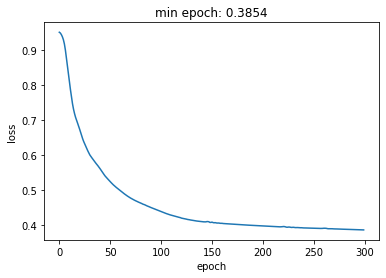

In [39]:
plt.plot(np.arange(num_epochs),loss_epoch)
plt.title('min epoch: {:.4f}'.format(min(loss_epoch)))
plt.xlabel('epoch')
plt.ylabel('loss')

In [40]:
x_transform = model(x_train)
latent_space = model.encoder(x_train)

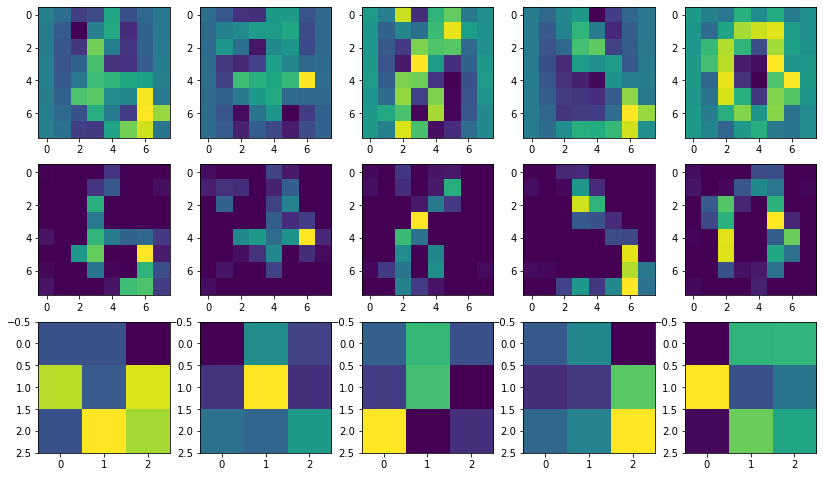

In [41]:
# muestra los resultados de las cuatro capas de convolucion
plt.figure(figsize=(14,14))
offset = 16
for i in range(5):
    plt.subplot(5,5,i+1) #imagenes originales
    plt.imshow(x_train[i+offset][0].detach().numpy())
    #plt.title(train_loader.dataset.classes[train_loader.dataset.targets[i+offset]] )
    
    j=0 # las imagenes reconstruidas por el autoencoder
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(x_transform[i+offset][0].detach().numpy())
    
    j=1 # una de las capas de la representacion latente
    plt.subplot(5,5,(i+1)+5*(j+1))
    plt.imshow(latent_space[i+offset][2].detach().numpy())
plt.savefig('results.png')